Author: Nicolas Legrand <nicolas.legrand@cfin.au.dk>

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pingouin as pg
from plotting import raincloud
from scipy.stats import norm

sns.set_context('notebook')

In [2]:
path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
outputpath = os.path.join(
    os.path.abspath(os.path.join(os.getcwd(), os.pardir)),
    'data')

In [3]:
def plot_parameters(df, title):
    fig, axs = plt.subplots(2, 1, figsize=(4, 8), sharey='row')

    for i, metric in enumerate(['Threshold', 'Slope']):
        raincloud(data=df, x='Modality', y=metric, ax=axs[i], palette=['#c44e52', '#4c72b0'])
        labels = [item.get_text() for item in axs[i].get_xticklabels()]
        labels[0] = 'Interoception'
        labels[1] = 'Exteroception'
        axs[i].set_xticklabels(labels, size=12)
        axs[i].minorticks_on()
        axs[i].set_axisbelow(True)
        axs[i].grid(which='major', axis='y',linestyle='--')
        axs[i].tick_params(axis='x', which='minor', bottom=False)

    axs[1].set_ylabel('Slope', size=15)
    axs[0].set_ylabel('Threshold', size=15)

    plt.tight_layout()
    sns.despine()
    plt.savefig(path + f'/figures/{title}.svg', dpi=300)

In [4]:
def plot_psychometricFunctions(df, title):

    fig, axs = plt.subplots(2, 1, figsize=(6, 8))
    for i, modality, col in zip((0, 1), ['Intero', 'Extero'], ['#c44e52', '#4c72b0']):
        threshold, slope = [], []
        for subject in df.Subject.unique():
            threshold.append(df.Threshold[(behavior_df.Modality == modality) & (behavior_df.Subject == subject)].values)
            slope.append(df.Slope[(behavior_df.Modality == modality) & (behavior_df.Subject == subject)].values)

            # Plot Psi estimate of psychometric function
            axs[i].plot(np.linspace(-40, 40, 500), 
                    (norm.cdf(np.linspace(-40, 40, 500), loc=threshold[-1], scale=slope[-1])),
                    '-', color='gray', alpha=.05)
            axs[i].set_ylabel('P$_{(Response=Faster)}$', size=12)
            axs[i].set_xlabel('Intensity ($\Delta$ BPM)', size=12)
        axs[i].plot(np.linspace(-40, 40, 500), 
                (norm.cdf(np.linspace(-40, 40, 500), loc=np.array([threshold]).mean(), scale=np.array([slope]).mean())),
                '-', color=col, linewidth=4)
        axs[i].axvline(x=np.array([threshold]).mean(), ymin=0, ymax=0.5, linestyle='--', color=col, linewidth=2)
        axs[i].plot(np.array([threshold]).mean(), 0.5, 'o', color=col, markersize=15)
        axs[i].plot(np.array([threshold]).mean(), 0.5, 'o', color='w', markersize=12)
        axs[i].minorticks_on()
        axs[i].set_axisbelow(True)
        axs[i].grid(which='major', linestyle='--')
        axs[i].tick_params(axis='y', which='minor', left=False)

    plt.tight_layout()
    sns.despine()
    plt.savefig(path + f'/figures/{title}.svg', dpi=600)

Model fitting is performed using PyMC3 by running the `bayesianPsychophysics.py` file.

# Psychometric parameters - Psi estimates

In [5]:
behavior_df = pd.read_csv(os.path.join(outputpath, 'behavior.txt'))

## Session 1

In [6]:
print(f'n Session 1 = {behavior_df[(behavior_df.Session=="Del1") & (~behavior_df["Slope"].isnull())].Subject.nunique()}')

n Session 1 = 205


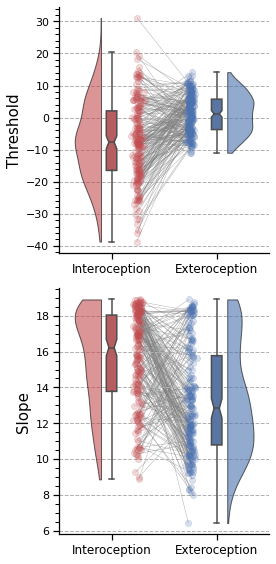

In [7]:
plot_parameters(
    df=behavior_df[(behavior_df.Session=='Del1') & (~behavior_df['Slope'].isnull()) & (~behavior_df['Threshold'].isnull())],
    title='Supplement1')

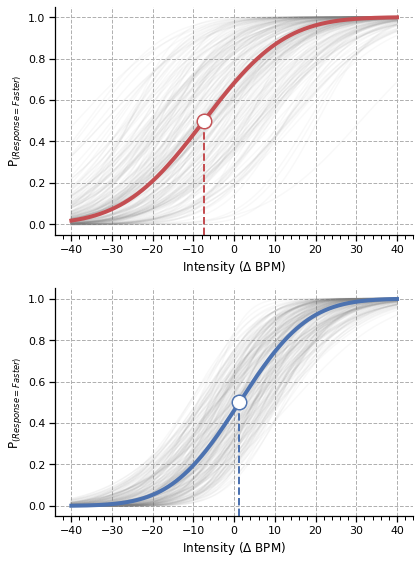

In [8]:
plot_psychometricFunctions(
    df=behavior_df[(behavior_df.Session=='Del1') & (~behavior_df['Slope'].isnull()) & (~behavior_df['Threshold'].isnull())],
    title='Supplement2')

In [9]:
pg.pairwise_ttests(data=behavior_df[behavior_df.Session=='Del1'], dv='Threshold', within='Modality', subject='Subject', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,True,True,9.749091,204.0,two-sided,1.117549e-18,4.36e+15,0.896845


In [10]:
pg.pairwise_ttests(data=behavior_df[behavior_df.Session=='Del1'], dv='Slope', within='Modality', subject='Subject', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,True,True,-8.153624,204.0,two-sided,3.542390e-14,1.729e+11,-0.834132


## Session 2

In [11]:
print(f'n Session 2 = {behavior_df[(behavior_df.Session=="Del2") & (~behavior_df["Slope"].isnull())].Subject.nunique()}')

n Session 2 = 187


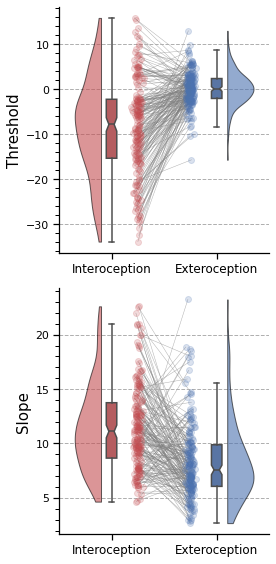

In [12]:
plot_parameters(
    df=behavior_df[(behavior_df.Session=='Del2') & (~behavior_df['Slope'].isnull()) & (~behavior_df['Threshold'].isnull())],
    title='Supplement3')

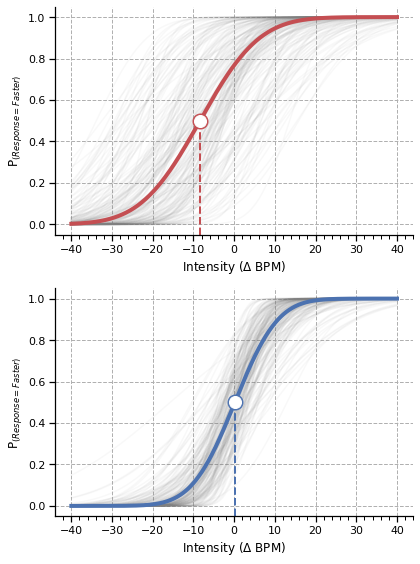

In [13]:
plot_psychometricFunctions(
    df=behavior_df[(behavior_df.Session=='Del2') & (~behavior_df['Slope'].isnull()) & (~behavior_df['Threshold'].isnull())],
    title='Supplement4')

In [14]:
pg.pairwise_ttests(data=behavior_df[behavior_df.Session=='Del2'], dv='Threshold', within='Modality', subject='Subject', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,True,True,11.635888,186.0,two-sided,7.267868e-24,5.484e+20,1.073992


In [15]:
pg.pairwise_ttests(data=behavior_df[behavior_df.Session=='Del2'], dv='Slope', within='Modality', subject='Subject', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,True,True,-8.700586,186.0,two-sided,1.735307e-15,3.357e+12,-0.852063


# Psychometric parameters - post hoc Bayesian estimates

## Session 1

In [16]:
del1 = pd.read_csv(os.path.join(outputpath, 'Del1_psychophysics.txt'))
print(f'n Session 1 = {del1.Subject.nunique()}')

n Session 1 = 205


In [17]:
def plot_parameters(df, title):
    fig, axs = plt.subplots(2, 1, figsize=(4, 8), sharey='row')

    for i, metric in enumerate(['BayesianThreshold', 'BayesianSlope']):
        raincloud(data=df, x='Modality', y=metric, ax=axs[i], palette=['#c44e52', '#4c72b0'])
        labels = [item.get_text() for item in axs[i].get_xticklabels()]
        labels[0] = 'Interoception'
        labels[1] = 'Exteroception'
        axs[i].set_xticklabels(labels, size=12)
        axs[i].minorticks_on()
        axs[i].set_axisbelow(True)
        axs[i].grid(which='major', axis='y',linestyle='--')
        axs[i].tick_params(axis='x', which='minor', bottom=False)

    axs[1].set_ylabel('Slope', size=15)
    axs[0].set_ylabel('Threshold', size=15)

    plt.tight_layout()
    sns.despine()
    plt.savefig(path + f'/figures/{title}.svg', dpi=300)

In [18]:
def plot_psychometricFunctions(df, title):

    fig, axs = plt.subplots(2, 1, figsize=(6, 8))
    for i, modality, col in zip((0, 1), ['Intero', 'Extero'], ['#c44e52', '#4c72b0']):
        threshold, slope = [], []
        for subject in df.Subject.unique():
            threshold.append(df.BayesianThreshold[(behavior_df.Modality == modality) & (behavior_df.Subject == subject)].values)
            slope.append(df.BayesianSlope[(behavior_df.Modality == modality) & (behavior_df.Subject == subject)].values)

            # Plot Psi estimate of psychometric function
            axs[i].plot(np.linspace(-40, 40, 500), 
                    (norm.cdf(np.linspace(-40, 40, 500), loc=threshold[-1], scale=slope[-1])),
                    '-', color='gray', alpha=.05)
            axs[i].set_ylabel('P$_{(Response=Faster)}$', size=12)
            axs[i].set_xlabel('Intensity ($\Delta$ BPM)', size=12)
        axs[i].plot(np.linspace(-40, 40, 500), 
                (norm.cdf(np.linspace(-40, 40, 500), loc=np.array([threshold]).mean(), scale=np.array([slope]).mean())),
                '-', color=col, linewidth=4)
        axs[i].axvline(x=np.array([threshold]).mean(), ymin=0, ymax=0.5, linestyle='--', color=col, linewidth=2)
        axs[i].plot(np.array([threshold]).mean(), 0.5, 'o', color=col, markersize=15)
        axs[i].plot(np.array([threshold]).mean(), 0.5, 'o', color='w', markersize=12)
        axs[i].minorticks_on()
        axs[i].set_axisbelow(True)
        axs[i].grid(which='major', linestyle='--')
        axs[i].tick_params(axis='y', which='minor', left=False)

    plt.tight_layout()
    sns.despine()
    plt.savefig(path + f'/figures/{title}.svg', dpi=600)

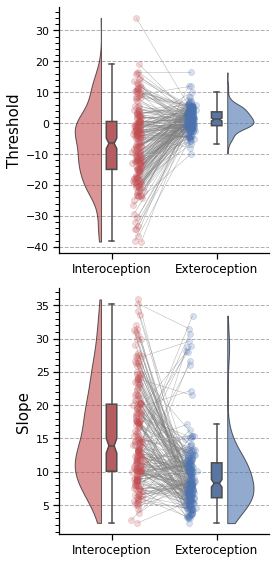

In [19]:
plot_parameters(
    df=del1,
    title='Fig2Parameters')

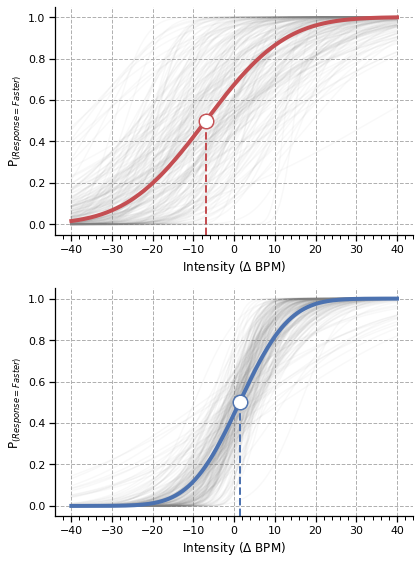

In [20]:
plot_psychometricFunctions(
    df=del1,
    title='Fig2Functions')

In [21]:
pg.pairwise_ttests(data=del1, subject='Subject', dv='BayesianThreshold', within='Modality', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,True,True,9.825567,204.0,two-sided,6.680735e-19,7.219e+15,0.934215


In [22]:
pg.pairwise_ttests(data=del1, subject='Subject', dv='BayesianSlope', within='Modality', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,True,True,-9.165005,204.0,two-sided,5.417902e-17,9.74e+13,-0.900149


## Session 2

In [23]:
del2 = pd.read_csv(os.path.join(outputpath, 'Del2_psychophysics.txt'))
print(f'n Session 2 = {del2.Subject.nunique()}')

n Session 2 = 187


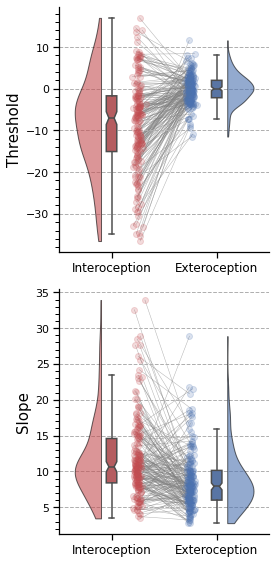

In [24]:
plot_parameters(
    df=del2,
    title='Supplement_Del2PsiParameters')

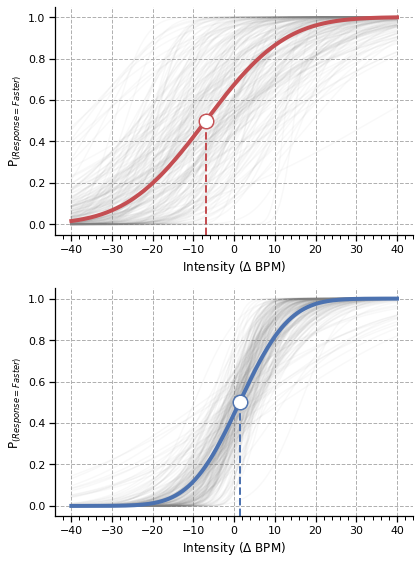

In [25]:
plot_psychometricFunctions(
    df=del1,
    title='Supplement_Del2PsiFunction')

In [26]:
pg.pairwise_ttests(data=del2, subject='Subject', dv='BayesianThreshold', within='Modality', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,True,True,11.099803,186.0,two-sided,2.720728e-22,1.559e+19,1.038792


In [27]:
pg.pairwise_ttests(data=del2, subject='Subject', dv='BayesianSlope', within='Modality', effsize='cohen')

,Contrast,A,B,Paired,Parametric,T,dof,Tail,p-unc,BF10,cohen
0,Modality,Extero,Intero,True,True,-7.076895,186.0,two-sided,2.916569e-11,2.589e+08,-0.655578


# Test re-test

In [77]:
del1['Session'] = 'Del1'
del2['Session'] = 'Del2'
corr_df = pd.merge(del1, del2, on=['Subject', 'Modality'])

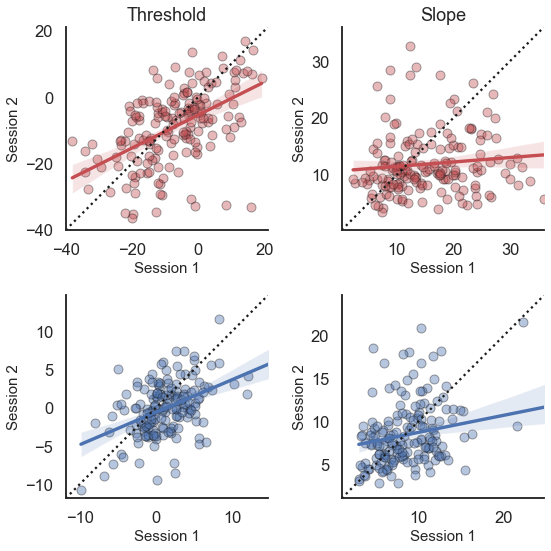

In [78]:
sns.set(style="white", color_codes=True)
sns.set_context('talk')

fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(8, 8))
for mod, var, ax, col in zip(['Intero', 'Intero', 'Extero', 'Extero'],
                            [('BayesianThreshold_x', 'BayesianThreshold_y'), ('BayesianSlope_x', 'BayesianSlope_y'), ('BayesianThreshold_x', 'BayesianThreshold_y'), ('BayesianSlope_x', 'BayesianSlope_y')],
                            [axs[0, 0], axs[0, 1], axs[1, 0], axs[1, 1]],
                             ['#c44e52', '#c44e52', '#4c72b0', '#4c72b0']):

    sns.regplot(data=corr_df[corr_df.Modality==mod], x=var[0], y=var[1], ax=ax, scatter_kws={'edgecolors': 'k', 'alpha': 0.4}, color=col)
    
    x0, x1 = ax.get_xlim()
    y0, y1 = ax.get_ylim()
    lims = [max(x0, y0)-2, min(x1, y1)+2]
    ax.plot(lims, lims, ':k')
    ax.set_xlabel('Session 1', size=15)
    ax.set_ylabel('Session 2', size=15)
    ax.set_xlim(lims)
    ax.set_ylim(lims)

axs[0, 0].set_title('Threshold')
axs[0, 1].set_title('Slope')

plt.tight_layout()
sns.despine()
plt.savefig(path + '/figures/Fig2_Correlations.svg', dpi=300)

In [79]:
pg.corr(x=corr_df[corr_df.Modality=='Intero'].BayesianThreshold_x.to_numpy(), 
        y=corr_df[corr_df.Modality=='Intero'].BayesianThreshold_y.to_numpy(),
        method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,173,0.529463,"[0.41, 0.63]",0.280331,0.271864,6.912243e-14,1.0


In [80]:
pg.corr(x=corr_df[corr_df.Modality=='Intero'].BayesianSlope_x.to_numpy(), 
        y=corr_df[corr_df.Modality=='Intero'].BayesianSlope_y.to_numpy(),
        method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,173,0.164601,"[0.02, 0.31]",0.027094,0.015648,0.030458,0.5837


In [81]:
pg.corr(x=corr_df[corr_df.Modality=='Extero'].BayesianThreshold_x.to_numpy(), 
        y=corr_df[corr_df.Modality=='Extero'].BayesianThreshold_y.to_numpy(),
        method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,173,0.412479,"[0.28, 0.53]",0.170139,0.160376,1.709460e-08,0.99992


In [82]:
pg.corr(x=corr_df[corr_df.Modality=='Extero'].BayesianSlope_x.to_numpy(), 
        y=corr_df[corr_df.Modality=='Extero'].BayesianSlope_y.to_numpy(),
        method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,173,0.317667,"[0.18, 0.45]",0.100912,0.090335,0.000021,0.990399


# Correlation between psi and Bayesian fit

## Session 1

### Threshold

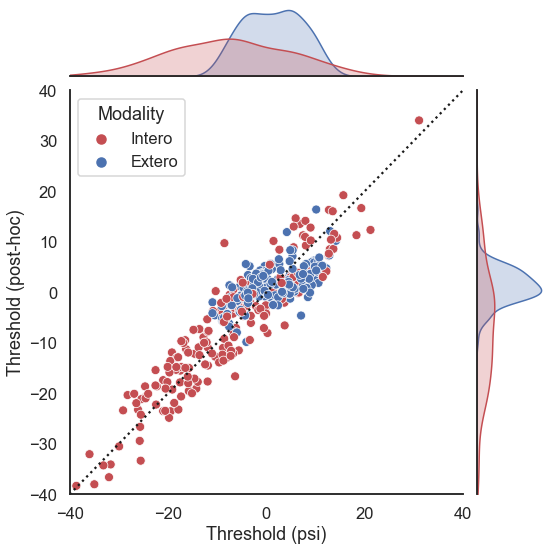

In [102]:
g = sns.jointplot(data=del1,
                  x='Threshold', y='BayesianThreshold', hue='Modality', xlim=(-40, 40),
                  ylim=(-40, 40), palette=['#c44e52', '#4c72b0'], height=8)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')
g.ax_joint.set_ylabel('Threshold (post-hoc)')
g.ax_joint.set_xlabel('Threshold (psi)')
plt.savefig(path + '/figures/Supplement6.svg', dpi=300)

In [103]:
pg.corr(x=del1[del1.Modality=='Extero'].Threshold,
        y=del1[del1.Modality=='Extero'].BayesianThreshold, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,205,0.644406,"[0.56, 0.72]",0.415259,0.409469,1.915941e-25,1.0


In [104]:
pg.corr(x=del1[del1.Modality=='Intero'].Threshold,
        y=del1[del1.Modality=='Intero'].BayesianThreshold, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,205,0.923824,"[0.9, 0.94]",0.85345,0.851999,1.346572e-86,1.0


## Slope

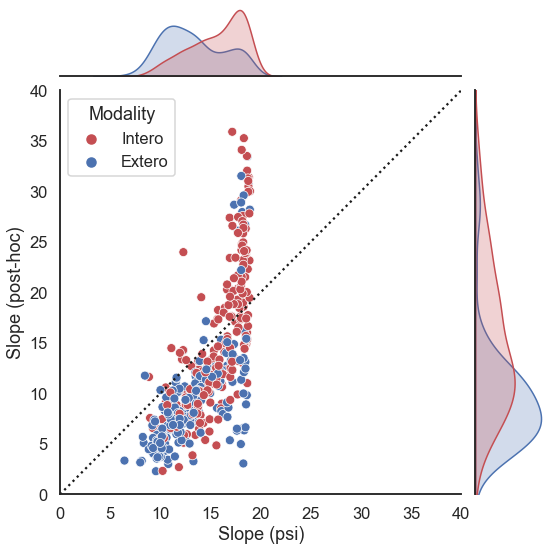

In [105]:
g = sns.jointplot(data=del1,
                  x='Slope', y='BayesianSlope', hue='Modality', xlim=(0, 40),
                  ylim=(0, 40), palette=['#c44e52', '#4c72b0'], height=8)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')
g.ax_joint.set_ylabel('Slope (post-hoc)')
g.ax_joint.set_xlabel('Slope (psi)')
plt.savefig(path + '/figures/Supplement7.svg', dpi=300)

In [106]:
pg.corr(x=del1[del1.Modality=='Extero'].Slope,
        y=del1[del1.Modality=='Extero'].BayesianSlope, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,205,0.694952,"[0.62, 0.76]",0.482958,0.477838,6.704438e-31,1.0


In [107]:
pg.corr(x=del1[del1.Modality=='Intero'].Slope,
        y=del1[del1.Modality=='Intero'].BayesianSlope, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,205,0.797784,"[0.74, 0.84]",0.636459,0.63286,1.740627e-46,1.0


## Session 2

### Threshold

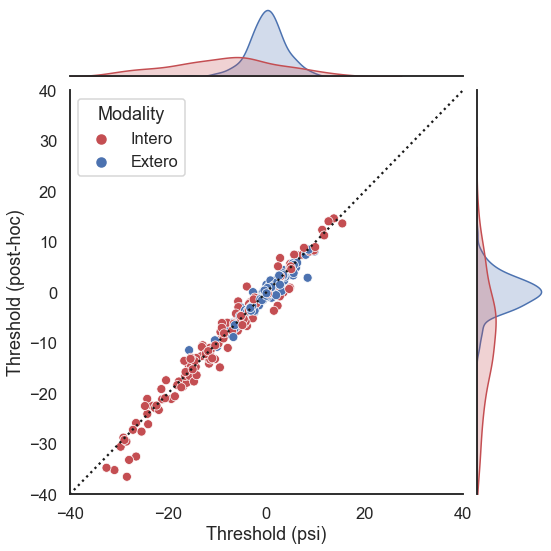

In [108]:
g = sns.jointplot(data=del2,
                  x='Threshold', y='BayesianThreshold', hue='Modality', xlim=(-40, 40),
                  ylim=(-40, 40), palette=['#c44e52', '#4c72b0'], height=8)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')
g.ax_joint.set_ylabel('Threshold (post-hoc)')
g.ax_joint.set_xlabel('Threshold (psi)')
plt.savefig(path + '/figures/Supplement8.svg', dpi=300)

In [109]:
pg.corr(x=del2[del2.Modality=='Extero'].Threshold,
        y=del2[del2.Modality=='Extero'].BayesianThreshold, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,153,0.963357,"[0.95, 0.97]",0.928056,0.927097,3.394188e-88,1.0


In [110]:
pg.corr(x=del2[del2.Modality=='Intero'].Threshold,
        y=del2[del2.Modality=='Intero'].BayesianThreshold, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,143,0.982087,"[0.98, 0.99]",0.964494,0.963987,4.271067e-104,1.0


## Slope

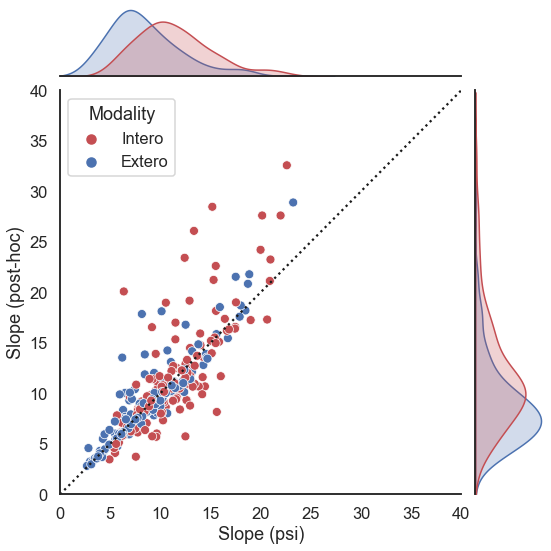

In [111]:
g = sns.jointplot(data=del2,
                  x='Slope', y='BayesianSlope', hue='Modality', xlim=(0, 40),
                  ylim=(0, 40), palette=['#c44e52', '#4c72b0'], height=8)
x0, x1 = g.ax_joint.get_xlim()
y0, y1 = g.ax_joint.get_ylim()
lims = [max(x0, y0), min(x1, y1)]
g.ax_joint.plot(lims, lims, ':k')
g.ax_joint.set_ylabel('Slope (post-hoc)')
g.ax_joint.set_xlabel('Slope (psi)')
plt.savefig(path + '/figures/Supplement9.svg', dpi=300)

In [112]:
pg.corr(x=del2[del2.Modality=='Extero'].Slope,
        y=del2[del2.Modality=='Extero'].BayesianSlope, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,153,0.905776,"[0.87, 0.93]",0.820431,0.818036,3.537028e-58,1.0


In [113]:
pg.corr(x=del2[del2.Modality=='Intero'].Slope,
        y=del2[del2.Modality=='Intero'].BayesianSlope, method='spearman')

,n,r,CI95%,r2,adj_r2,p-val,power
spearman,143,0.775765,"[0.7, 0.83]",0.601811,0.596123,5.509569e-30,1.0


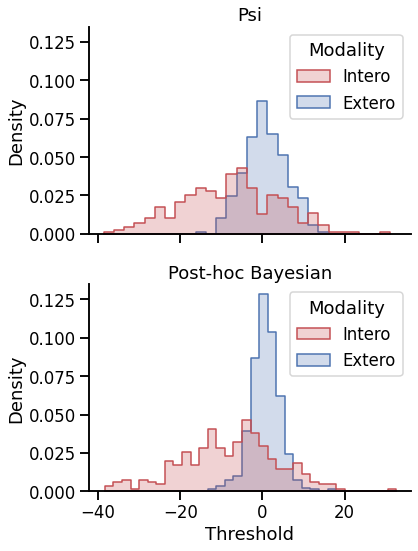

In [166]:
fig, axs = plt.subplots(2, 1, figsize=(6, 8), sharey=True, sharex=True)
sns.histplot(data=behavior_df, x='Threshold', hue='Modality', palette=['#c44e52', '#4c72b0'], ax=axs[0], common_norm=False, element="step", stat="density")
sns.histplot(data=behavior_df, x='BayesianThreshold', hue='Modality', palette=['#c44e52', '#4c72b0'], ax=axs[1], common_norm=False, element="step", stat="density")
axs[1].set_xlabel('Threshold')
axs[0].set_title('Psi')
axs[1].set_title('Post-hoc Bayesian')
plt.tight_layout()
sns.despine()